In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df_path = r'./cell_data_nn.pkl'

In [3]:
df = pd.read_pickle(df_path)
len(df)

32296

In [4]:
# remove 
df_sel = df.loc[df.nn_phase!='error',:]
len(df_sel)

30181

In [5]:
df_sel['condition'] = ['_'.join(x.split('_')[2:-1]) for x in df_sel.im_frame]
df_sel['set'] = [x.split('_')[1] for x in df_sel.im_frame]

C:\ProgramData\Anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
set(df_sel['condition'])

{'PA_10min',
 'PA_30min',
 'PA_VAN10_10min',
 'PA_VAN10_30min',
 'PA_VAN20_10min',
 'PA_VAN20_30min',
 'Untreated_10min',
 'Untreated_30min',
 'VAN20_10min',
 'VAN20_30min'}

In [7]:
set(df_sel['set'])

{'set1', 'set2', 'set3'}

In [8]:
cond_order = ['Untreated_10min','PA_10min','VAN20_10min','PA_VAN10_10min','PA_VAN20_10min',
             'Untreated_30min','PA_30min','VAN20_30min','PA_VAN10_30min','PA_VAN20_30min']

## Analysis of phase distribution

In [9]:
df_group = df_sel.groupby('condition')['nn_phase'].value_counts(normalize=True)
df_group = df_group.mul(100)
df_group = df_group.rename('percent').reset_index()
df_group

,condition,nn_phase,percent
0,PA_10min,phase1,62.163731
1,PA_10min,phase2,26.069286
2,PA_10min,phase3,11.766983
3,PA_30min,phase1,59.205874
4,PA_30min,phase2,28.991025
5,PA_30min,phase3,11.803100
6,PA_VAN10_10min,phase1,50.140845
7,PA_VAN10_10min,phase2,26.760563
8,PA_VAN10_10min,phase3,23.098592
9,PA_VAN10_30min,phase1,49.855072


In [10]:
df_phases = df_group.pivot(index='condition',columns='nn_phase')
df_phases.columns = df_phases.columns.get_level_values(1)
df_phases['phase1+phase2'] = df_phases['phase1'] + df_phases['phase2']
df_phases['phase1+phase2+phases3'] = df_phases['phase1'] + df_phases['phase2'] + df_phases['phase3']
df_phases = df_phases.reset_index()
df_phases = df_phases.set_index('condition').loc[cond_order]
df_phases

nn_phase,phase1,phase2,phase3,phase1+phase2,phase1+phase2+phases3
condition,,,,,
Untreated_10min,70.944310,22.719935,6.335755,93.664245,100.0
PA_10min,62.163731,26.069286,11.766983,88.233017,100.0
VAN20_10min,68.173790,24.761568,7.064641,92.935359,100.0
PA_VAN10_10min,50.140845,26.760563,23.098592,76.901408,100.0
PA_VAN20_10min,44.568245,23.584030,31.847725,68.152275,100.0
Untreated_30min,60.546102,32.409972,7.043926,92.956074,100.0
PA_30min,59.205874,28.991025,11.803100,88.196900,100.0
VAN20_30min,73.598685,21.635932,4.765383,95.234617,100.0
PA_VAN10_30min,49.855072,22.028986,28.115942,71.884058,100.0


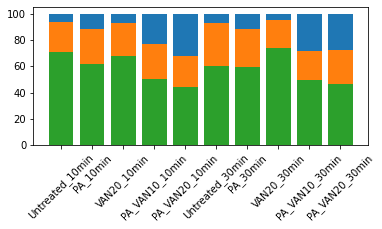

In [11]:
fig,ax = plt.subplots(1)

plt.bar(df_phases.index,df_phases['phase1+phase2+phases3'])
plt.bar(df_phases.index,df_phases['phase1+phase2'])
plt.bar(df_phases.index,df_phases['phase1'])

plt.xticks(rotation=45)
fig.subplots_adjust(bottom=0.4)

## Analysis of volume

In [16]:
df_sel['volume_cal'] = df_sel.volume*64**3/10**9

C:\ProgramData\Anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


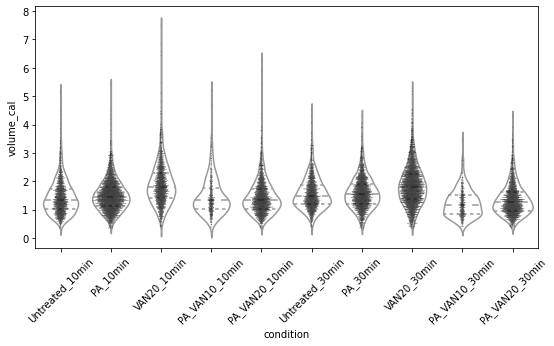

In [17]:
fig,ax=plt.subplots(1,figsize=(9,7))
sn.violinplot(data=df_sel,x='condition',y='volume_cal',order=cond_order,inner='quartile',color='white')
sn.swarmplot(data=df_sel,x='condition',y='volume_cal',order=cond_order,color='black',s=0.5)

plt.xticks(rotation=45)
fig.subplots_adjust(bottom=0.4)

## Analysis of foci count

In [19]:
df_group = df_sel.groupby('condition')['foci_number_grouped'].value_counts(normalize=True)
df_group = df_group.mul(100)
df_group = df_group.rename('percent').reset_index()
df_group

,condition,foci_number_grouped,percent
0,PA_10min,0.0,80.898007
1,PA_10min,1.0,17.302110
2,PA_10min,>=2,1.799884
3,PA_30min,0.0,84.742997
4,PA_30min,1.0,13.679630
5,PA_30min,>=2,1.577373
6,PA_VAN10_10min,0.0,82.112676
7,PA_VAN10_10min,1.0,15.492958
8,PA_VAN10_10min,>=2,2.394366
9,PA_VAN10_30min,1.0,52.318841


In [29]:
df_foci = df_group.pivot(index='condition',columns='foci_number_grouped')
df_foci.columns = df_foci.columns.get_level_values(1)
df_foci['0-1'] = df_foci[0.0] + df_phases[1.0]
df_foci['>=0'] = df_foci[0.0] + df_foci[1.0] + df_foci['>=2']
df_foci = df_foci.reset_index()
df_foci = df_foci.set_index('condition').loc[cond_order]
df_foci

foci_number_grouped,0.0,1.0,>=2,0-1,>=0
condition,,,,,
Untreated_10min,86.279257,13.075061,0.645682,99.354318,100.0
PA_10min,80.898007,17.302110,1.799884,98.200116,100.0
VAN20_10min,85.552808,11.797951,2.649241,97.350759,100.0
PA_VAN10_10min,82.112676,15.492958,2.394366,97.605634,100.0
PA_VAN20_10min,45.930053,44.506345,9.563603,90.436397,100.0
Untreated_30min,86.307875,12.702810,0.989315,99.010685,100.0
PA_30min,84.742997,13.679630,1.577373,98.422627,100.0
VAN20_30min,94.339967,4.911448,0.748585,99.251415,100.0
PA_VAN10_30min,45.797101,52.318841,1.884058,98.115942,100.0


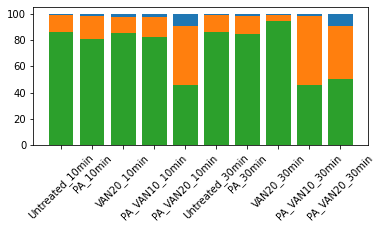

In [31]:
fig,ax = plt.subplots(1)

plt.bar(df_foci.index,df_foci['>=0'])
plt.bar(df_foci.index,df_foci['0-1'])
plt.bar(df_foci.index,df_foci[0.0])

plt.xticks(rotation=45)
fig.subplots_adjust(bottom=0.4)